In [1]:
# using keras imdb dataset
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Embedding, LSTM, Conv1D, MaxPool1D
from keras.callbacks import ModelCheckpoint
from keras.layers.wrappers import Bidirectional

import os
from sklearn.metrics import roc_auc_score

import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# set up params
output = 'model/dense_example'
epochs = 4
batch = 128

n_dim = 64
n_words = 5000
n_words_skip = 50
max_length = 200
pad_type = trunc_type = 'pre' # truncate start of reviews

n_dense = 64
dropout = 0.5

In [10]:
# load data
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=n_words, skip_top=n_words_skip)

In [11]:
x_train = pad_sequences(x_train, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)
x_val = pad_sequences(x_val, maxlen=max_length, padding=pad_type, truncating=trunc_type, value=0)

In [12]:
# setup our nn model
model = Sequential()

model.add(Embedding(n_words, n_dim, input_length=max_length))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPool1D(64,))
model.add(Bidirectional(LSTM(64, dropout=dropout)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 198, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 398,529
Trainable params: 398,529
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(
    x_train, 
    y_train,
    epochs=epochs, 
    batch_size=batch, 
    verbose=1, 
    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 15s 603us/step - loss: 0.5221 - acc: 0.7225 - val_loss: 0.3544 - val_acc: 0.8455
Epoch 2/4
25000/25000 [==============================] - 12s 481us/step - loss: 0.3187 - acc: 0.8645 - val_loss: 0.3386 - val_acc: 0.8524
Epoch 3/4
25000/25000 [==============================] - 12s 491us/step - loss: 0.2542 - acc: 0.8970 - val_loss: 0.3398 - val_acc: 0.8527
Epoch 4/4
25000/25000 [==============================] - 12s 481us/step - loss: 0.1910 - acc: 0.9254 - val_loss: 0.3868 - val_acc: 0.8494


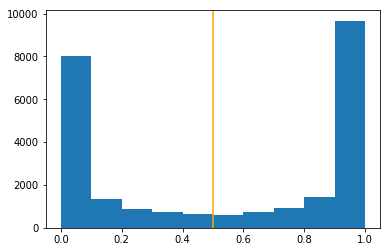

In [16]:
plt.hist(model.predict(x_val))
_ = plt.axvline(x=0.5, color='orange')